In [9]:
# %load autoencoder_tf_test.py
# Copyright (c) 2016-2017, Deogtae Kim & DTWARE Inc. All rights reserved.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.reset_default_graph()
tf.set_random_seed(107)
 
## 데이터 수집

# ECG 훈련 데이터 및 테스트 데이터를 읽어 오기
train_ecg = pd.read_csv("ecg_discord_train.csv", header=None)
test_ecg = pd.read_csv("ecg_discord_test.csv", header=None)

In [10]:
## 데이터 탐색

print(train_ecg.shape)
train_ecg.head()

(20, 210)


,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,2.10,2.13,2.19,2.28,2.44,2.62,2.80,3.04,3.36,3.69,...,2.99,2.74,2.61,2.47,2.35,2.26,2.20,2.15,2.10,2.08
1,2.06,2.05,2.06,2.07,2.08,2.13,2.22,2.37,2.53,2.71,...,3.62,3.38,3.17,2.92,2.64,2.45,2.33,2.23,2.13,2.08
2,2.05,2.05,2.03,2.02,2.03,2.04,2.08,2.14,2.28,2.44,...,3.71,3.33,3.01,2.74,2.55,2.51,2.30,2.17,2.10,2.08
3,2.07,2.04,2.03,2.05,2.05,2.04,2.05,2.09,2.14,2.22,...,3.27,3.02,2.74,2.54,2.39,2.27,2.17,2.13,2.11,2.07
4,2.06,2.07,2.07,2.08,2.08,2.12,2.18,2.28,2.43,2.66,...,2.31,2.22,2.16,2.12,2.08,2.08,2.08,2.07,2.06,2.09


In [11]:
print(test_ecg.shape)
test_ecg.head()

(23, 210)


,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,2.10,2.13,2.19,2.28,2.44,2.62,2.80,3.04,3.36,3.69,...,2.99,2.74,2.61,2.47,2.35,2.26,2.20,2.15,2.10,2.08
1,2.06,2.05,2.06,2.07,2.08,2.13,2.22,2.37,2.53,2.71,...,3.62,3.38,3.17,2.92,2.64,2.45,2.33,2.23,2.13,2.08
2,2.05,2.05,2.03,2.02,2.03,2.04,2.08,2.14,2.28,2.44,...,3.71,3.33,3.01,2.74,2.55,2.51,2.30,2.17,2.10,2.08
3,2.07,2.04,2.03,2.05,2.05,2.04,2.05,2.09,2.14,2.22,...,3.27,3.02,2.74,2.54,2.39,2.27,2.17,2.13,2.11,2.07
4,2.06,2.07,2.07,2.08,2.08,2.12,2.18,2.28,2.43,2.66,...,2.31,2.22,2.16,2.12,2.08,2.08,2.08,2.07,2.06,2.09


In [12]:
## 학습 모델 생성: Deep Autoencoder

# 하이퍼 매개변수 설정
learning_rate = 0.0001
training_epochs = 13000
display_step = 500
examples_to_show = 10

n_input = 210   # input 210개
n_hidden_1 = 50 # 첫번째 층의 뉴런(특징, 속성) 갯수
n_hidden_2 = 20 # 두번째 층의 뉴런(특징, 속성) 갯수

# 텐서플로 그래프 외부 입력 홀더 생성
X = tf.placeholder("float", [None, n_input])    # 임의의 개수의 행이 들어옴.

# 인코더 생성
EW1 = tf.Variable(tf.random_normal([n_input, n_hidden_1]))      # Encoder weight. 210*50 matrix 생성
Eb1 = tf.Variable(tf.random_normal([n_hidden_1]))               # Encoder bias.
#EL1 = tf.nn.tanh(tf.matmul(X, EW1) + Eb1)                       # autoencoder의 경우는 tanh가 잘 맞는다.
EL1 = tf.nn.sigmoid(tf.matmul(X, EW1) + Eb1)                   # 평균적으로는 sigmoid나 relu는 오토인코더에서 성능이 조금 떨어짐.

EW2 = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))   # 50*20 -> 210 개를 20 개로 줄임.
Eb2 = tf.Variable(tf.random_normal([n_hidden_2]))
#EL2 = tf.nn.tanh(tf.matmul(EL1, EW2) + Eb2)
EL2 = tf.nn.sigmoid(tf.matmul(EL1, EW2) + Eb2)

# 디코더 생성
DW1 = tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1]))   # 20*50 -> 50 개로 복원
Db1 = tf.Variable(tf.random_normal([n_hidden_1]))
#DL1 = tf.nn.tanh(tf.matmul(EL2, DW1) + Db1)
DL1 = tf.nn.sigmoid(tf.matmul(EL2, DW1) + Db1)

DW2 = tf.Variable(tf.random_normal([n_hidden_1, n_input]))      # 50*210 -> 210 개로 복원 
Db2 = tf.Variable(tf.random_normal([n_input]))
DL2 = tf.matmul(DL1, DW2) + Db2                                 # tanh는 -1~1로 바꾸기 때문에 마지막에는 tanh을 쓰지 않는다.

# 예측
y_pred = DL2    # 마지막 레이어에서 나온 예측값.
y_true = X

# 손실 함수 정의 및 최적화 알고리듬 설정
cost = tf.reduce_mean(tf.square(y_true-y_pred))                 # 실제값과 예측값의 mean square 값.
#train_step = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 텐서플로 변수 초기화, 변수를 초기화 시켜줘야 학습이 잘됨.
init = tf.global_variables_initializer()

In [13]:
## 훈련

sess = tf.Session()
sess.run(init)
import time
start = time.time()
for epoch in range(training_epochs):
    _, c = sess.run([train_step, cost], feed_dict={X: train_ecg})
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
print("훈련 시간:", time.time() - start)  

## 모델 평가

test_recon = sess.run(y_pred, feed_dict={X: test_ecg})  # 테스트 데이터에 대한 예측

Epoch: 0001 cost= 43.226116180


Epoch: 0501 cost= 27.260156631


Epoch: 1001 cost= 17.126342773


Epoch: 1501 cost= 10.130349159


Epoch: 2001 cost= 5.851553917


Epoch: 2501 cost= 3.316522598


Epoch: 3001 cost= 1.942021966


Epoch: 3501 cost= 1.261236191


Epoch: 4001 cost= 0.961441934


Epoch: 4501 cost= 0.823113799


Epoch: 5001 cost= 0.746765614


Epoch: 5501 cost= 0.688105285


Epoch: 6001 cost= 0.628530145


Epoch: 6501 cost= 0.559191406


Epoch: 7001 cost= 0.487590283


Epoch: 7501 cost= 0.417382568


Epoch: 8001 cost= 0.351175874


Epoch: 8501 cost= 0.293057144


Epoch: 9001 cost= 0.244598210


Epoch: 9501 cost= 0.205449939


Epoch: 10001 cost= 0.168997437


Epoch: 10501 cost= 0.142710954


Epoch: 11001 cost= 0.122199550


Epoch: 11501 cost= 0.105158120


Epoch: 12001 cost= 0.090179808


Epoch: 12501 cost= 0.076722488


훈련 시간: 8.187113285064697


In [14]:
print(test_ecg.iloc[0:5, 0:5])  # test data의 일부분만 잘라서 출력.
print(test_recon[0:5, 0:5])

      0     1     2     3     4
0  2.10  2.13  2.19  2.28  2.44
1  2.06  2.05  2.06  2.07  2.08
2  2.05  2.05  2.03  2.02  2.03
3  2.07  2.04  2.03  2.05  2.05
4  2.06  2.07  2.07  2.08  2.08
[[2.3310432 2.162773  2.0993366 2.4528728 2.3466709]
 [1.9653969 1.8994085 2.0121717 2.1110132 2.0530055]
 [1.8814836 1.8308293 1.9483795 2.0448577 2.0276341]
 [1.8571959 1.8494424 2.0222716 1.9826546 1.9892473]
 [1.974621  1.8916084 2.0467644 2.0836082 2.138217 ]]


In [15]:
test_recon_error = ((test_recon - test_ecg) ** 2).mean(axis=1)          
# reconstruction error(복구 오차), axis: 0(행), 1(열) 축을 없앤다. -> 따라서 0의 경우에는 열 별로 연산, 1의 경우에는 행 별로 연산    
print(test_recon_error)
print("평균 복원 오차:", np.mean(test_recon_error))
print("정상 데이터 평균 복원 오차:", np.mean(test_recon_error[0:20]))
print("비정상 데이터 평균 복원 오차:", np.mean(test_recon_error[20:23]))

0     0.044555
1     0.025069
2     0.040438
3     0.055028
4     0.038808
5     0.121004
6     0.091256
7     0.043427
8     0.082883
9     0.068031
10    0.026743
11    0.104338
12    0.065555
13    0.047703
14    0.055021
15    0.059537
16    0.055872
17    0.049137
18    0.040132
19    0.188856
20    1.532717
21    3.651049
22    2.956862
dtype: float64
평균 복원 오차: 0.4106096091592024
정상 데이터 평균 복원 오차: 0.0651696877101052
비정상 데이터 평균 복원 오차: 2.7135424188198507


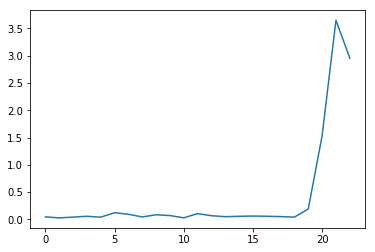

In [16]:
# 이상 데이터 (ouliers) (마지막 3개의 ECG 데이터)를 시각화
plt.ion()
plt.plot(test_recon_error)
plt.show()

sess.close()